In [61]:
! pip install -U tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [63]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [64]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [65]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='C:\\Users\\sanya\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
  

In [66]:
class_names = metadata.features['label'].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [67]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("no. of training examplels: {}".format(num_train_examples))
print("no. of testing examplels: {}".format(num_test_examples))

no. of training examplels: 60000
no. of testing examplels: 10000


In [68]:
print(train_dataset)
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [69]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return(images, labels)

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

Text(0.5, 0, 'Pullover')

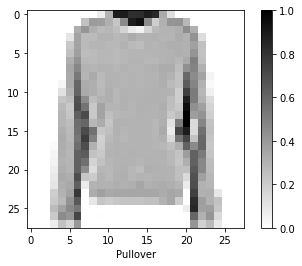

In [70]:
for image, label in train_dataset.take(1):
    break

image = image.numpy().reshape((28,28))

plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel(class_names[label])

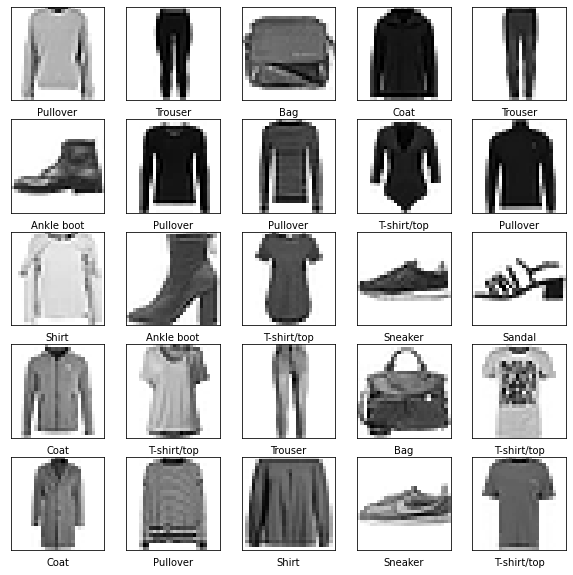

In [71]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax),
])

In [73]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [74]:
batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)

In [75]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4931 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3742 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3332 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3077 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2919 - accuracy: 0.8908


In [78]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/batch_size))
print("Accuracy:", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8798
Accuracy: 0.879800021648407


In [147]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 19ms/step


In [90]:
predictions.shape

(32, 10)

In [91]:
predictions[0]

array([5.3293032e-05, 1.9922613e-06, 2.7559282e-02, 8.2310080e-06,
       9.1981351e-01, 2.3475568e-09, 5.2515410e-02, 4.8242574e-09,
       4.8327583e-05, 2.8690486e-09], dtype=float32)

In [92]:
np.argmax(predictions[0])

4

In [94]:
test_labels[0]

4

In [130]:
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label==true_label else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label= predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

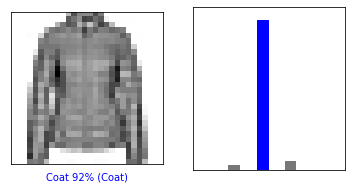

In [137]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

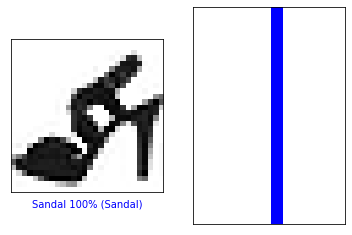

In [138]:
i = 7
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

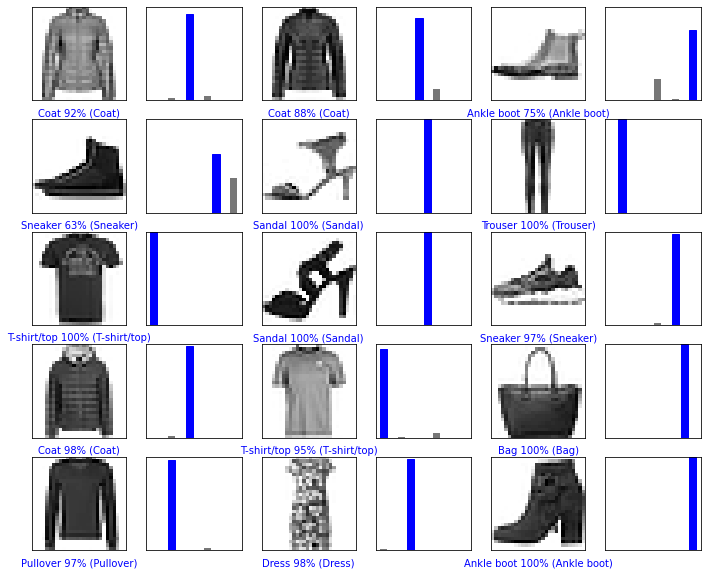

In [139]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

1/1 [==============================] - 0s 17ms/step


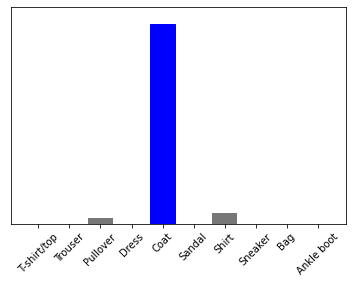

In [149]:
img = test_images[0]
img = np.array([img])
predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)